# Workshop 1: Computer Vision

In this workshop we will learn the fundamental operations of Computer Vision. The structure of the workshop will be the following:


1.   Exploratory analysis of imaging data
2.   Contrast enhancement
3.   Convolutional filters
4.   Geometric transformations
5.   Object Identification

The main libraries that will be used in the workshop are:



*   PIL (Python Image Library)
*   OpenCV (Open Computer Vision)





## Download images from Google Drive

In [ ]:
# Import Google Drive libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate with your Google Account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download the images of the workshop
download = drive.CreateFile({'id': '1Br47aTyNChZxuU7s7s4k255JpO485i3z'})
download.GetContentFile('workshop1.zip')

In [ ]:
# Extract the files
import zipfile
from pathlib import Path
images_path = Path("./workshop1.zip")

with zipfile.ZipFile(str(images_path), 'r') as zip_ref:
    zip_ref.extractall("./")

In [ ]:
ls

## 1. Exploratory analysis of imaging data

In [1]:
# Import libraries
import cv2
from PIL import Image
import numpy as np

In [2]:
# Configure plot for appropiate visualization
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)

In [3]:
# Load an image with OpenCV and PIL
image_opencv = cv2.imread("lena.png")
image_pil = Image.open("lena.png")

In [4]:
# Explore the type of OpenCV and PIL
print("OpenCV type:", type(image_opencv))
print("PIL type: ", type(image_pil))

OpenCV type: <class 'numpy.ndarray'>
PIL type:  <class 'PIL.PngImagePlugin.PngImageFile'>


In [5]:
# Explore the data type of data
print("OpenCV Dtype:", image_opencv.dtype)
print("PIL Dtype:", np.array(image_pil).dtype)

OpenCV Dtype: uint8
PIL Dtype: uint8


In [6]:
# Explore range of data
print("OpenCV range:", "[", image_opencv.min(), ",", image_opencv.max(), "]")
print("PIL range:", "[", np.array(image_pil).min(), ",", 
      np.array(image_pil).max(), "]")

OpenCV range: [ 0 , 255 ]
PIL range: [ 0 , 255 ]


In [7]:
# Explore shape of data
print("OpenCV shape:", image_opencv.shape)
print("PIL shape:", np.array(image_pil).shape)

OpenCV shape: (1000, 1500, 3)
PIL shape: (1000, 1500, 3)


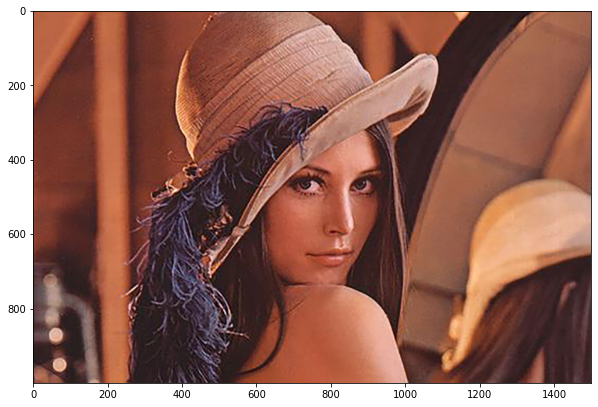

In [8]:
# Show image PIL format
plt.imshow(np.array(image_pil))

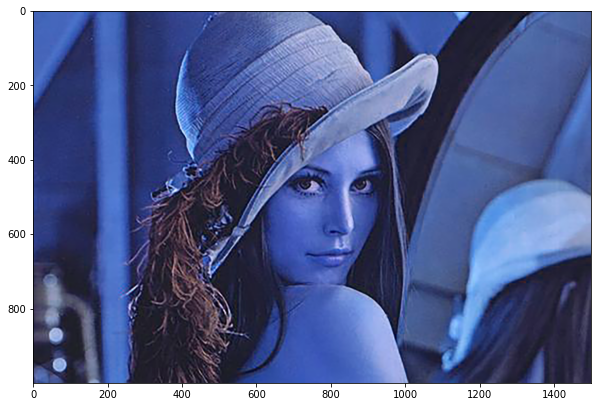

In [9]:
# Show OpenCV image
plt.imshow(image_opencv)

In [10]:
# Function to show OpenCV images correctly
def imshow_ocv_rgb(image):
  image_rgb = np.flip(image, axis=2)
  plt.imshow(image_rgb)

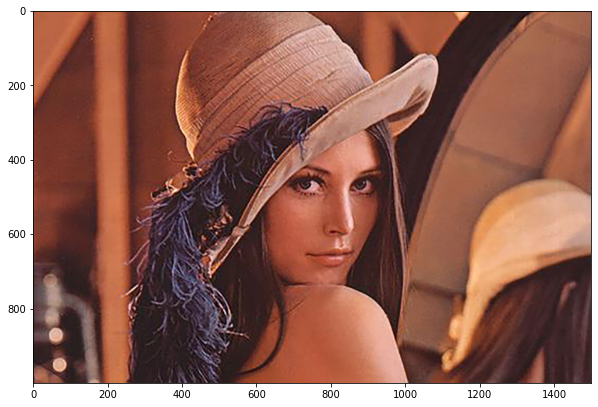

In [11]:
# Show OpenCV image
imshow_ocv_rgb(image_opencv)

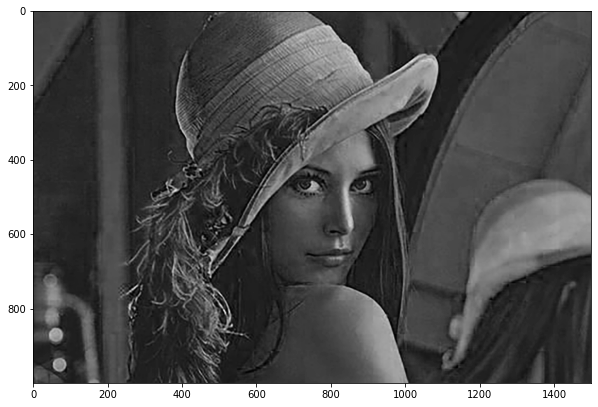

In [12]:
# Show blue channel of OpenCV image
plt.imshow(image_opencv[:, :, 0], cmap="gray")

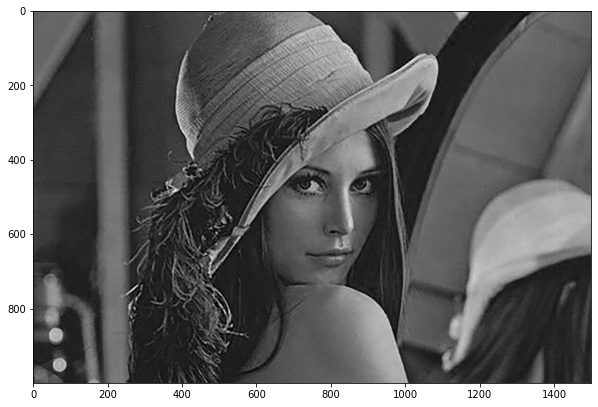

In [13]:
# Show green channel of OpenCV image
plt.imshow(image_opencv[:, :, 1], cmap="gray")

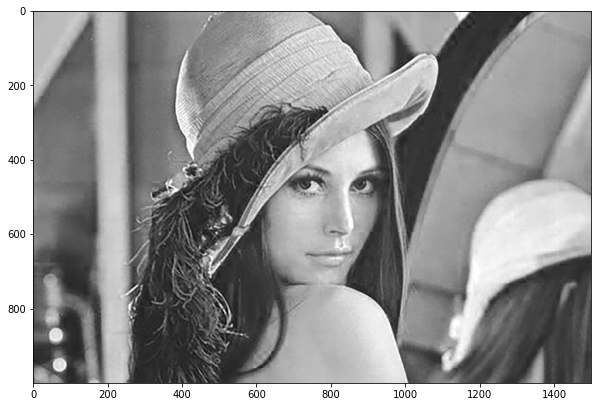

In [14]:
# Show red channel of OpenCV image
plt.imshow(image_opencv[:, :, 2], cmap="gray")

In [15]:
# Convert images to grayscale
image_ocv_gray = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)
image_pil_gray = image_pil.convert("L")

In [16]:
# Explore shape of data
print("OpenCV shape:", image_ocv_gray.shape)
print("PIL shape:", np.array(image_pil_gray).shape)

OpenCV shape: (1000, 1500)
PIL shape: (1000, 1500)


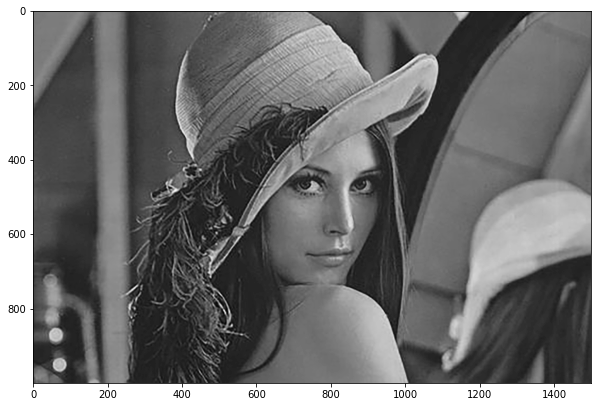

In [17]:
# Show image OpenCV in grayscale
plt.imshow(image_ocv_gray, cmap="gray")

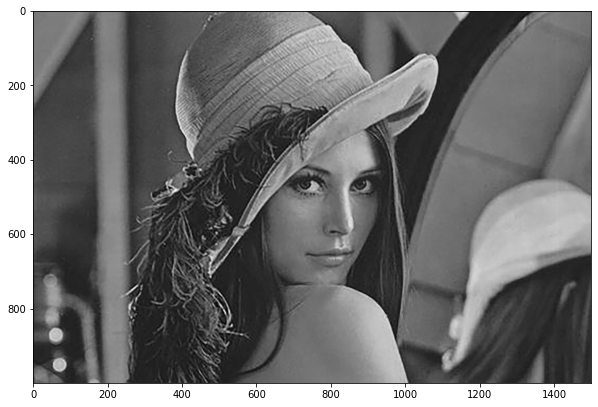

In [18]:
# Show image PIL in grayscale
plt.imshow(image_pil_gray, cmap="gray")

In [19]:
# Function to show histogram
def show_histo(image):  
  hist, bins = np.histogram(image, bins=255)
  width = 0.7 * (bins[1] - bins[0])
  center = (bins[:-1] + bins[1:]) / 2
  plt.bar(center, hist, align='center', width=width)
  plt.show()

(array([3.2000e+01, 4.5000e+01, 3.8000e+01, 5.7000e+01, 9.9000e+01,
        1.2100e+02, 1.3100e+02, 1.7300e+02, 2.0600e+02, 2.4400e+02,
        2.3500e+02, 2.7000e+02, 3.2800e+02, 4.2600e+02, 3.8400e+02,
        4.9700e+02, 5.9400e+02, 6.4400e+02, 7.7300e+02, 8.4400e+02,
        9.5400e+02, 1.0950e+03, 1.2740e+03, 1.5030e+03, 1.6470e+03,
        1.9610e+03, 2.2820e+03, 2.6530e+03, 3.1570e+03, 3.6630e+03,
        4.4150e+03, 5.5040e+03, 7.4720e+03, 1.0819e+04, 1.5401e+04,
        2.0828e+04, 2.3655e+04, 3.0196e+04, 2.8421e+04, 2.3390e+04,
        1.9823e+04, 1.6673e+04, 1.3960e+04, 1.2635e+04, 1.2286e+04,
        1.2526e+04, 1.2163e+04, 1.2220e+04, 1.1446e+04, 1.0974e+04,
        1.0639e+04, 1.0098e+04, 9.3060e+03, 8.6690e+03, 8.2110e+03,
        8.3940e+03, 7.8970e+03, 8.0930e+03, 8.6820e+03, 8.7430e+03,
        8.5960e+03, 8.4070e+03, 8.7790e+03, 9.0730e+03, 9.8780e+03,
        1.1239e+04, 1.2217e+04, 1.3170e+04, 1.5278e+04, 1.5178e+04,
        1.3818e+04, 1.3614e+04, 1.2297e+04, 1.02

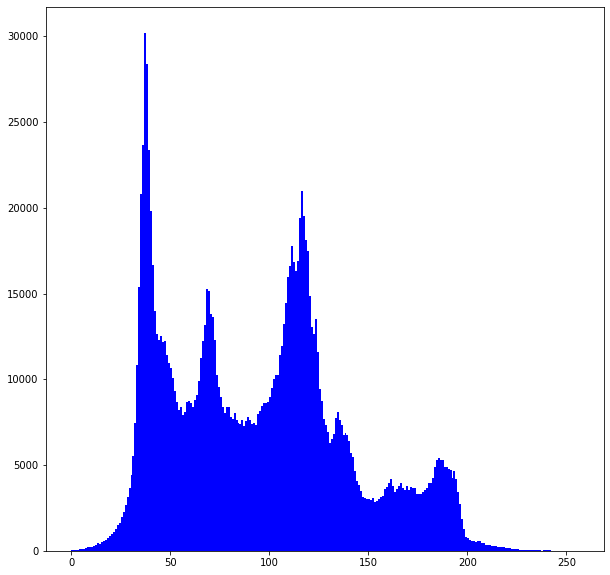

In [20]:
# Show histogram of an image
plt.hist(image_ocv_gray.flatten(), 256, [0,256], color = 'b')

## 2. Contrast enhancement

In [21]:
def show_bef_aft(img_bef, img_aft):
  img_bef_aft = np.hstack((img_bef, img_aft))
  plt.imshow(img_bef_aft, cmap="gray")

In [22]:
# Apply histogram equalization
image_equ = cv2.equalizeHist(image_ocv_gray)

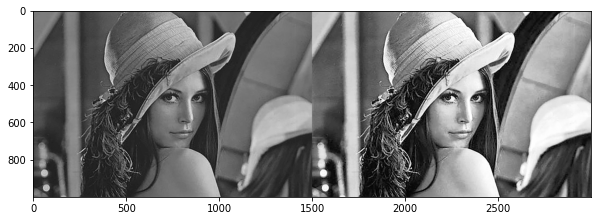

In [23]:
# Show effects of histogram equalization
show_bef_aft(image_ocv_gray, image_equ)

(array([ 2789.,  5401.,  6385.,  4935.,  6820.,  4415.,  5504.,  7472.,
            0., 10819.,     0.,     0., 15401.,     0.,     0., 20828.,
            0.,     0.,     0., 23655.,     0.,     0.,     0.,     0.,
            0., 30196.,     0.,     0.,     0., 28421.,     0.,     0.,
            0., 23390.,     0.,     0.,     0., 19823.,     0.,     0.,
        16673.,     0., 13960.,     0., 12635.,     0., 12286.,     0.,
        12526.,     0., 12163.,     0., 12220.,     0., 11446.,     0.,
        10974.,     0., 10639.,     0., 10098.,  9306.,     0.,  8669.,
         8211.,     0.,  8394.,  7897.,  8093.,     0.,  8682.,  8743.,
            0.,  8596.,  8407.,     0.,  8779.,  9073.,     0.,  9878.,
            0., 11239.,     0., 12217.,     0., 13170.,     0.,     0.,
        15278.,     0., 15178.,     0.,     0., 13818.,     0., 13614.,
            0., 12297.,     0., 10227.,  9545.,     0.,  8958.,  8400.,
            0.,  8032.,  8370.,     0.,  8404.,  7795.,  7701., 

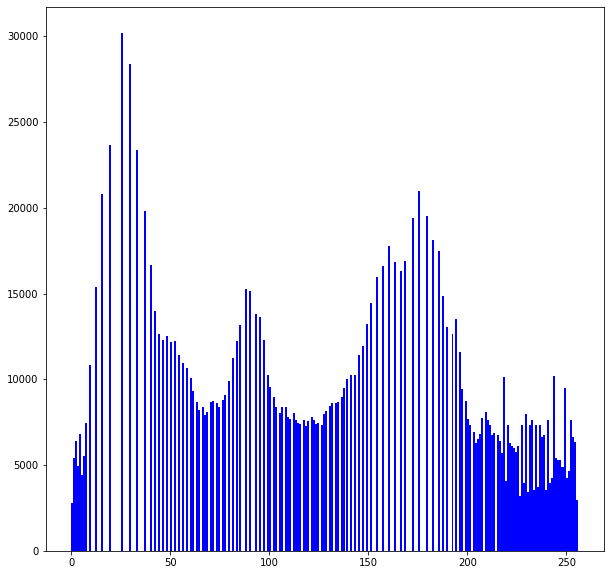

In [24]:
# Show histogram of equalized image
plt.hist(image_equ.flatten(), 256, [0,256], color = 'b')

In [25]:
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
image_clahe = clahe.apply(image_ocv_gray)

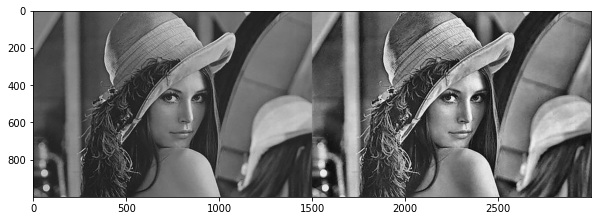

In [26]:
# Show effectos of CLAHE
show_bef_aft(image_ocv_gray, image_clahe)

(array([5.0000e+00, 1.4300e+02, 2.3000e+02, 4.1900e+02, 4.9200e+02,
        5.9700e+02, 7.1900e+02, 8.2400e+02, 9.3200e+02, 1.0670e+03,
        1.1160e+03, 1.2630e+03, 1.3910e+03, 1.6780e+03, 1.7190e+03,
        1.9940e+03, 2.2600e+03, 2.6790e+03, 2.6130e+03, 3.3580e+03,
        3.6550e+03, 3.8180e+03, 4.2150e+03, 4.1530e+03, 4.5640e+03,
        5.4110e+03, 5.4780e+03, 6.8930e+03, 6.6700e+03, 7.3150e+03,
        7.6760e+03, 9.9330e+03, 9.9490e+03, 1.0458e+04, 1.1802e+04,
        1.3542e+04, 1.1976e+04, 1.3055e+04, 1.3188e+04, 1.2282e+04,
        1.2328e+04, 1.2410e+04, 1.1592e+04, 1.1014e+04, 1.1479e+04,
        1.0804e+04, 9.9550e+03, 9.3780e+03, 9.3830e+03, 8.9890e+03,
        9.5010e+03, 7.7610e+03, 8.1750e+03, 8.8730e+03, 7.1790e+03,
        7.6090e+03, 7.5340e+03, 6.9200e+03, 7.4270e+03, 7.1710e+03,
        7.1090e+03, 7.4890e+03, 7.9690e+03, 7.7880e+03, 7.5180e+03,
        7.4130e+03, 8.3170e+03, 7.4150e+03, 7.1350e+03, 8.6400e+03,
        8.2390e+03, 7.9760e+03, 8.5550e+03, 8.90

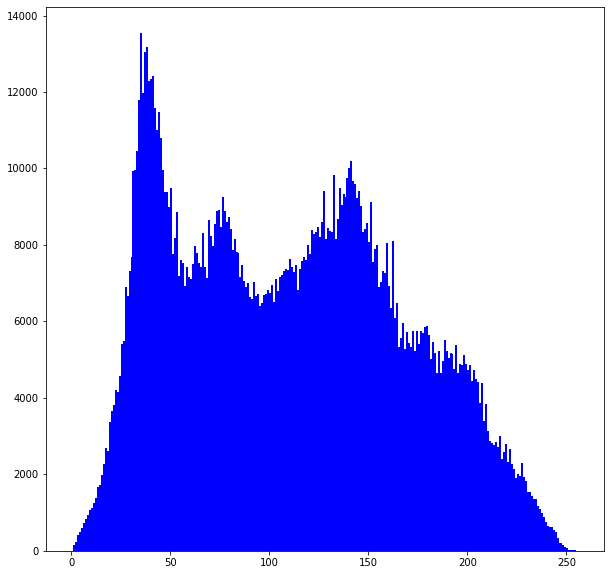

In [27]:
# Show histogram of equalized image
plt.hist(image_clahe.flatten(), 256, [0,256], color = 'b')

## 3. Convolutional filters

### Average Filter

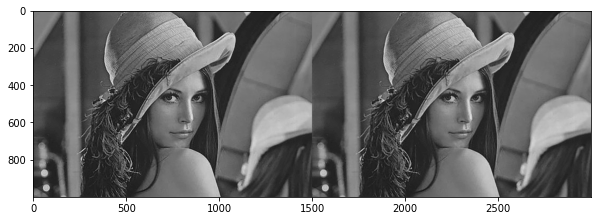

In [28]:
# Apply average filter 3x3
image_blur = cv2.blur(image_ocv_gray, (3,3))
show_bef_aft(image_ocv_gray, image_blur)

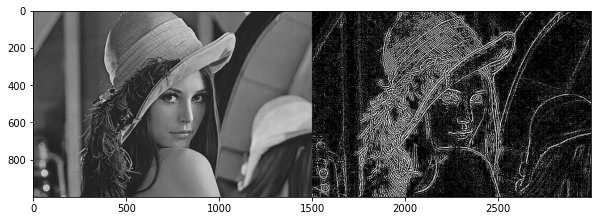

In [29]:
# Show difference
show_bef_aft(image_ocv_gray, image_ocv_gray - image_blur)

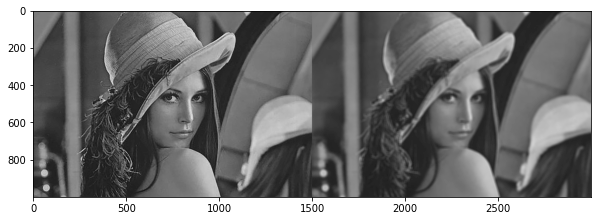

In [30]:
# Apply average filter 15x15
image_blur = cv2.blur(image_ocv_gray, (15,15))
show_bef_aft(image_ocv_gray, image_blur)

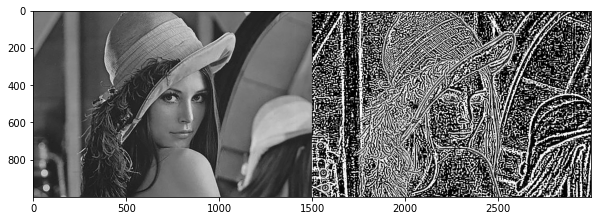

In [31]:
# Show difference
show_bef_aft(image_ocv_gray, image_ocv_gray - image_blur)

### Gaussian Filter

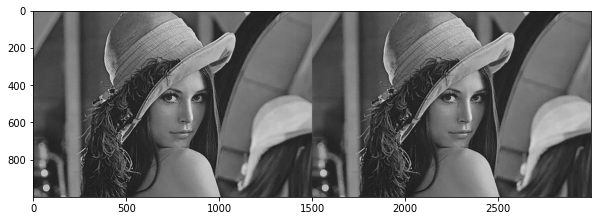

In [32]:
# Apply Gaussian filter ksize = 3x3 sigma = 1
ksize = 3
sigma = 1
image_blur = cv2.GaussianBlur(image_ocv_gray, ksize=(ksize,ksize), sigmaX=sigma,
                              sigmaY=sigma)
show_bef_aft(image_ocv_gray, image_blur)

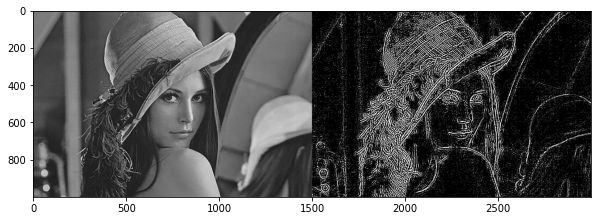

In [33]:
# Show difference
show_bef_aft(image_ocv_gray, image_ocv_gray - image_blur)

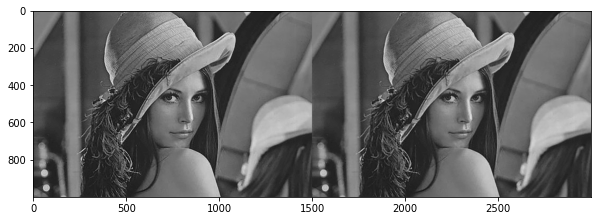

In [34]:
# Apply Gaussian filter ksize = 15x15 sigma = 1
ksize = 15
sigma = 1
image_blur = cv2.GaussianBlur(image_ocv_gray, ksize=(ksize,ksize), sigmaX=sigma,
                              sigmaY=sigma)
show_bef_aft(image_ocv_gray, image_blur)

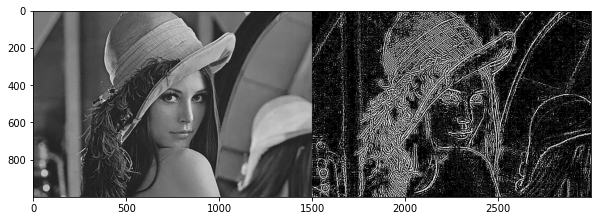

In [35]:
# Show difference
show_bef_aft(image_ocv_gray, image_ocv_gray - image_blur)

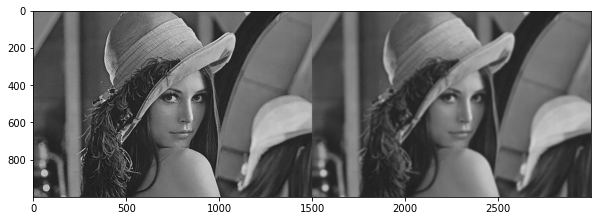

In [36]:
# Apply Gaussian filter ksize = 15x15 sigma = 4
ksize = 15
sigma = 7
image_blur = cv2.GaussianBlur(image_ocv_gray, ksize=(ksize,ksize), sigmaX=sigma,
                              sigmaY=sigma)
show_bef_aft(image_ocv_gray, image_blur)

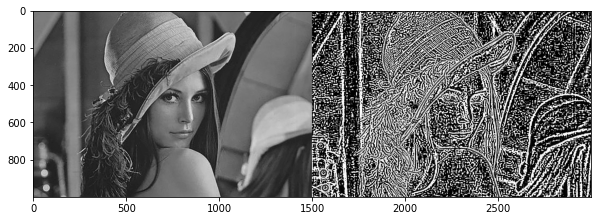

In [37]:
# Show difference
show_bef_aft(image_ocv_gray, image_ocv_gray - image_blur)

### Median Filter

In [38]:
# Function to add salt and pepper noise to the 6% of pixels of the image
def add_salt_pepper(image):
  random = np.random.randint(30, size=(image.shape[0],image.shape[1]))
  image_salt_pepper = np.copy(image)
  image_salt_pepper[random == 0] = 0
  image_salt_pepper[random == 29] = 255
  return image_salt_pepper

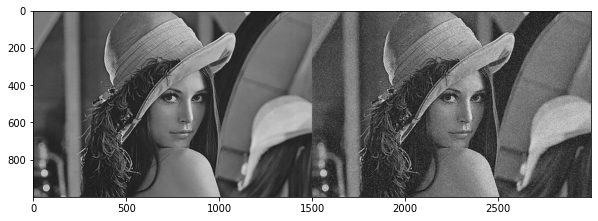

In [39]:
# Add salt and pepper noise
image_salt_pepper = add_salt_pepper(image_ocv_gray)
show_bef_aft(image_ocv_gray, image_salt_pepper)

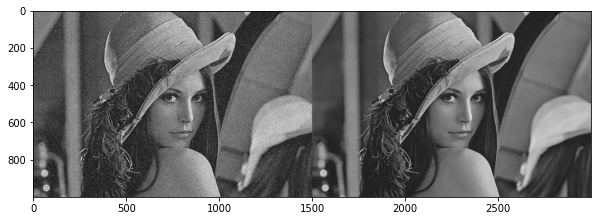

In [40]:
# Apply median filter
image_blur = cv2.medianBlur(image_salt_pepper, ksize=5)
show_bef_aft(image_salt_pepper, image_blur)

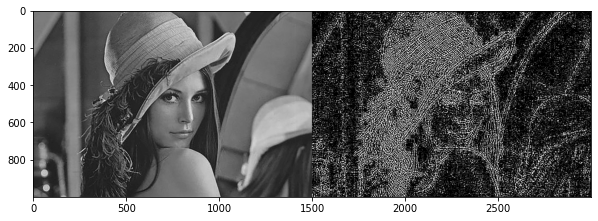

In [41]:
# Show difference
show_bef_aft(image_ocv_gray, image_ocv_gray - image_blur)

### Sobel & Laplacian Filters

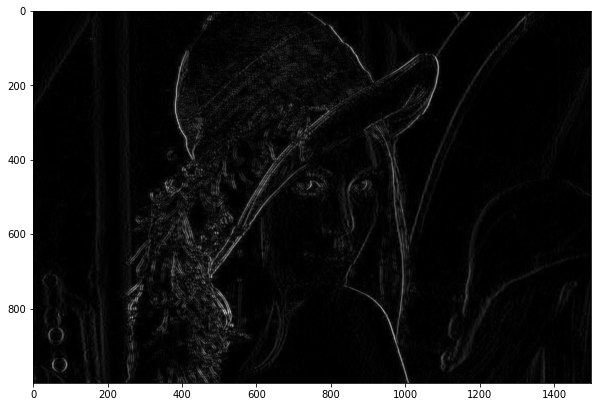

In [42]:
# Apply Sobel X filter
sobelx = cv2.Sobel(image_ocv_gray, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(np.abs(sobelx), cmap="gray")

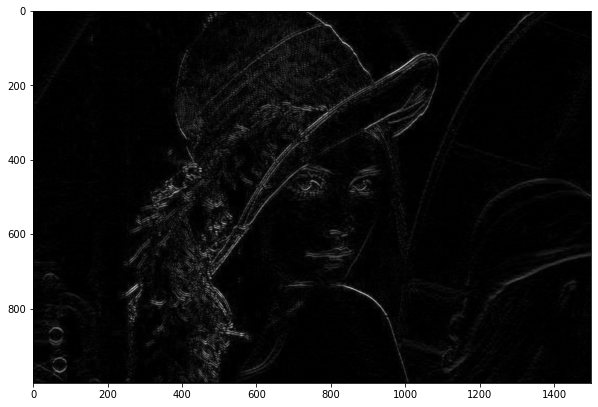

In [43]:
# Apply sobel Y
sobely = cv2.Sobel(image_ocv_gray, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(np.abs(sobely), cmap="gray")

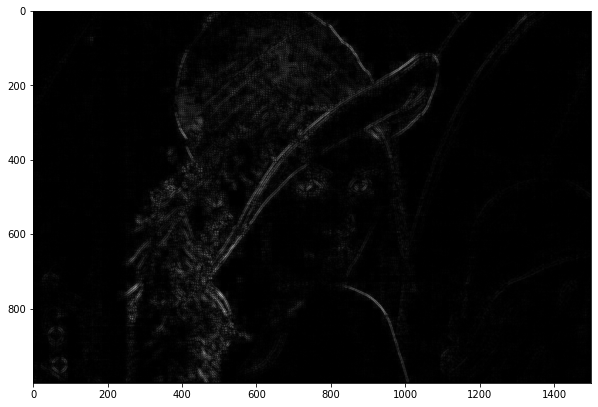

In [44]:
# Apply sobel XY
sobelxy = cv2.Sobel(image_ocv_gray, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(np.abs(sobelxy), cmap="gray")

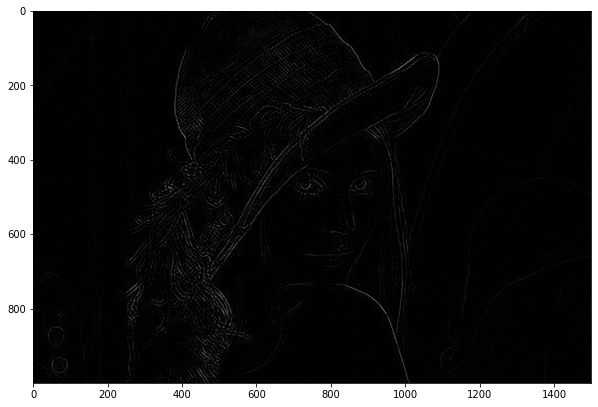

In [45]:
laplacian = cv2.Laplacian(image_ocv_gray,cv2.CV_64F)
laplacian[laplacian < 0] = 0
plt.imshow(laplacian, cmap="gray")

## 4. Geometric transformations

Shape before resize:  (1000, 1500)
Shape after resize:  (100, 150)


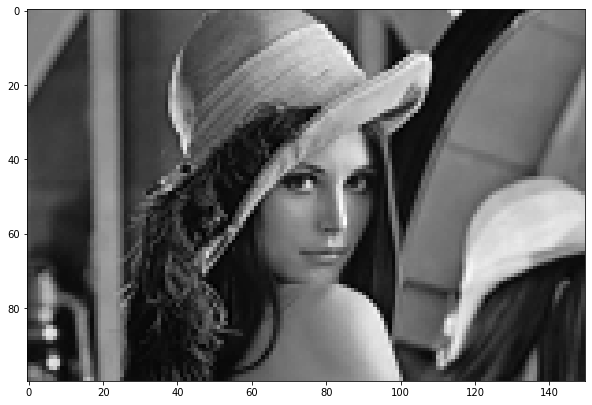

In [46]:
# Image resize
image_pil_res = image_pil_gray.resize((150, 100))
plt.imshow(image_pil_res, cmap="gray")
print("Shape before resize: ", np.array(image_pil_gray).shape)
print("Shape after resize: ", np.array(image_pil_res).shape)

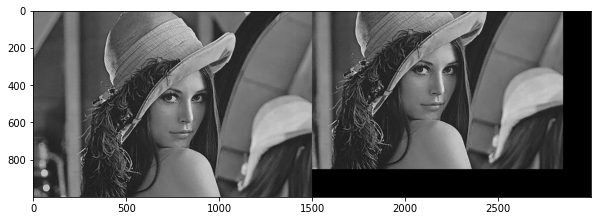

In [47]:
# Image translation
a = 1
b = 0
c = 150
d = 0
e = 1
f = 150
image_pil_tras = image_pil_gray.transform(image_pil_gray.size, Image.AFFINE, 
                               (a, b, c, d, e, f))
show_bef_aft(np.array(image_pil_gray), np.array(image_pil_tras))

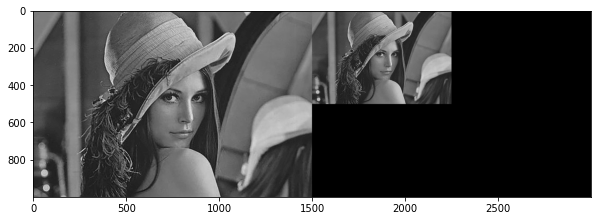

In [48]:
# Image scaling
a = 2
b = 0
c = 0
d = 0
e = 2
f = 0
image_pil_scl = image_pil_gray.transform(image_pil_gray.size, Image.AFFINE, 
                               (a, b, c, d, e, f))
show_bef_aft(np.array(image_pil_gray), np.array(image_pil_scl))

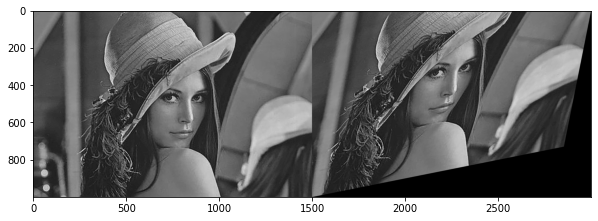

In [49]:
# Image perspective transform
a = 1
b = 0.2
c = 0
d = 0.2
e = 1
f = 0
image_pil_pers = image_pil_gray.transform(image_pil_gray.size, Image.AFFINE, 
                               (a, b, c, d, e, f))
show_bef_aft(np.array(image_pil_gray), np.array(image_pil_pers))

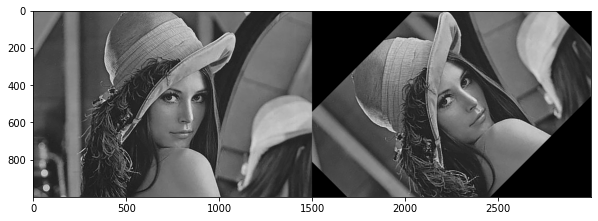

In [50]:
# Image rotation
image_pil_rot = image_pil_gray.rotate(45)
show_bef_aft(np.array(image_pil_gray), np.array(image_pil_rot))

## 5.   Object identification

### Contour estimation

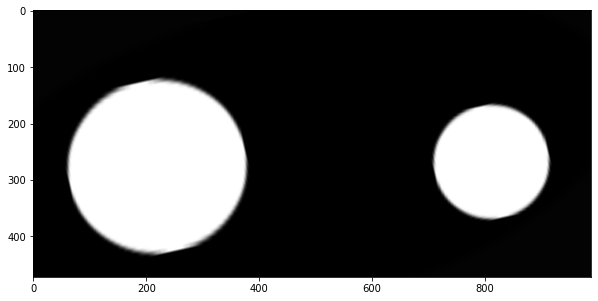

In [51]:
# Load circles.png images
circles = cv2.imread("circles.png", 0)
plt.imshow(circles, cmap="gray")

In [52]:
# Explore diffent pixel intensities of the image
print(np.unique(circles))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

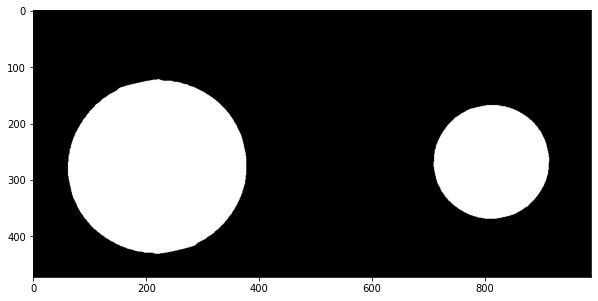

In [53]:
# Option 1: Binarize the image with thresholding
_, circles_th = cv2.threshold(circles, 127, 255, 0)
plt.imshow(circles_th, cmap="gray")

In [54]:
# Explore diffent pixel intensities of the image
print(np.unique(circles_th))

[  0 255]


In [55]:
# Find contours
contours, hierarchy = cv2.findContours(circles_th, cv2.RETR_TREE, 
                                      cv2.CHAIN_APPROX_SIMPLE)

In [56]:
# Function to show contours
def show_contours(img_shape, contours):
  img = np.zeros((img_shape[0], img_shape[1], 3))
  img = cv2.drawContours(img, contours, -1, (0,255,0), 3)
  imshow_ocv_rgb(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


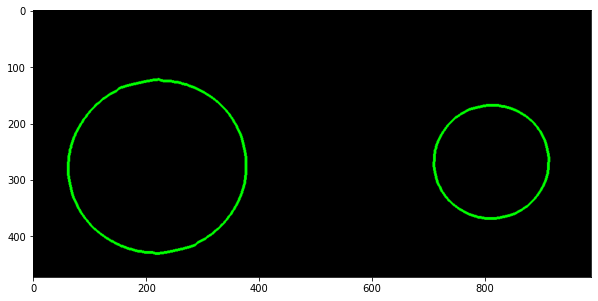

In [57]:
# Show all contours
show_contours(circles_th.shape, contours)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


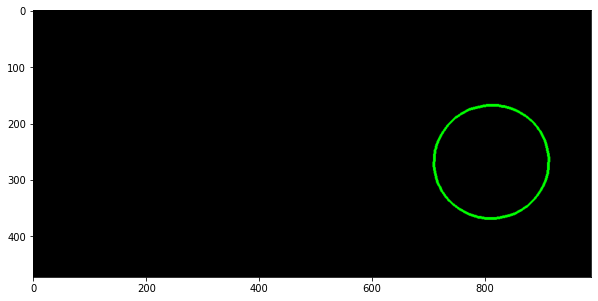

In [58]:
# Show first contour
show_contours(circles_th.shape, [contours[0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


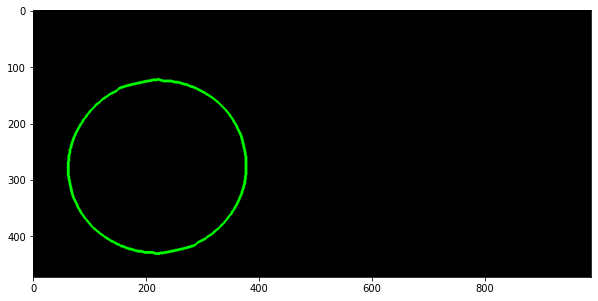

In [59]:
# Show second contour
show_contours(circles_th.shape, [contours[1]])

In [60]:
# Function to show contours over the original image
def overdraw_contours(img, contours):
  img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
  img_bgr = cv2.drawContours(img_bgr, contours, -1, (0,255,0), 3)
  imshow_ocv_rgb(img_bgr)

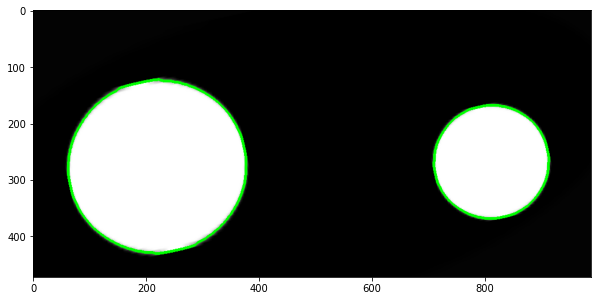

In [61]:
# Show contours over original image
overdraw_contours(circles, contours)

### Contour characteristcs

In [62]:
contour = contours[0]

In [63]:
# Conotour area
area = cv2.contourArea(contour)
print("Area of the contour in pixels:", area)

Area of the contour in pixels: 31976.5


In [64]:
# Contour perimeter
perimeter = cv2.arcLength(contour, closed=True)
print("Perimeter of the contour in pixels:", perimeter)

Perimeter of the contour in pixels: 670.3401817083359


In [65]:
# Bounding box
x,y,w,h = cv2.boundingRect(contour)

In [66]:
# Function to show a bounding box over the original image
def overdraw_bbox(img, x, y, w, h):
  img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
  img_bgr = cv2.rectangle(img_bgr,(x,y),(x+w,y+h),(0,255,0),2)
  imshow_ocv_rgb(img_bgr)

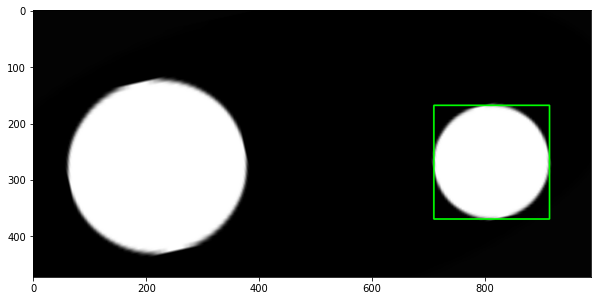

In [67]:
# Show bounding box
overdraw_bbox(circles, x, y, w, h)

# Exercise 1: Apply the concepts learnt in sections 1-4 to circles.png 

# Exercise 2: Apply the concepts learnt in section 5 to lena.png

# Exercise 3: Develop a program to remove automatically the smallest circle in circles.png

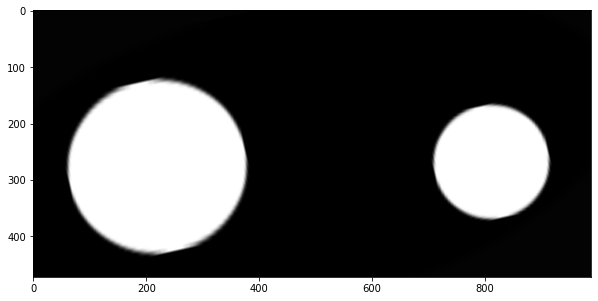

In [68]:
# Load circles.png images
circles = cv2.imread("circles.png", 0)
plt.imshow(circles, cmap="gray")

In [94]:
_, circles = cv2.threshold(circles, 127, 255, 0)

In [95]:
# Find contours
contours, hierarchy = cv2.findContours(circles_th, cv2.RETR_TREE, 
                                      cv2.CHAIN_APPROX_SIMPLE)

In [96]:
minArea = cv2.contourArea(contours[0])
minCont = contours[0]
for i in contours:
    area = cv2.contourArea(i)
    if area < minArea:
        minArea = area
        minCont = i

In [97]:
mask = np.ones(circles.shape[:2], dtype="uint8") * 255
cv2.drawContours(mask, [minCont], -1, 0, -1)
image = cv2.bitwise_and(circles, circles, mask=mask)

In [98]:
image.shape

(472, 989)

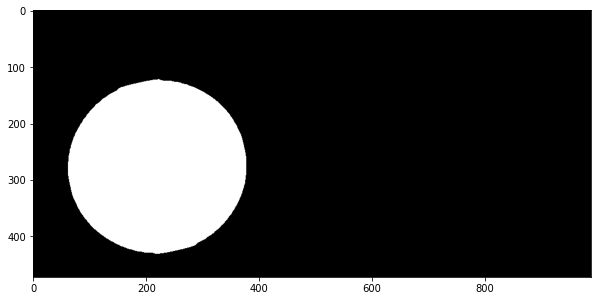

In [99]:
plt.imshow(image, cmap="gray")